In [1]:
#Importing the Libraries
import pandas as pd
from pandas import datetime
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
import sklearn as skl

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn import linear_model
# from keras.models import Sequential
# from keras.layers import Dense
# import keras.backend as K
# from keras.callbacks import EarlyStopping
#from keras.optimizers import Adam
# from keras.models import load_model
# from keras.layers import LSTM
# from keras.utils.vis_utils import plot_model

<ipython-input-1-6a436c80aa0d>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
#Get the Dataset
df=pd.read_csv("NewData/WFC2016_2022.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-19,49.250000,49.540001,47.990002,48.209999,39.842239,29918500
2016-01-20,47.279999,48.250000,46.880001,47.869999,39.561249,40241100
2016-01-21,48.029999,49.049999,47.910000,48.009998,39.676952,24272900
2016-01-22,49.029999,49.270000,48.560001,49.020000,40.511646,18298700
2016-01-25,48.910000,48.980000,47.619999,47.660000,39.387703,23440800


In [3]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [4]:
#Print the shape of Dataframe  and Check for Null Values
print("Dataframe Shape: ", df. shape)
print("Null Value Present: ", df.isnull().values.any())

Dataframe Shape:  (1596, 6)
Null Value Present:  False


<AxesSubplot:xlabel='Date'>

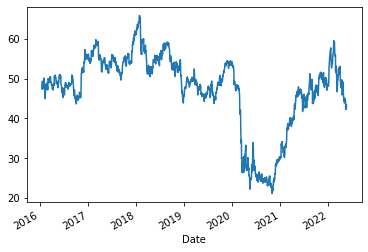

In [5]:
#Plot the True Adj Close Value
df["Open"].plot()

In [6]:
#Set Target Variable
output_var = pd.DataFrame(df["Open"])
#Selecting the Features
features = ['Close', 'High', 'Low', 'Volume']


In [7]:
# Scale the data using MinMax
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Close,High,Low,Volume
Date,,,,
2016-01-19,0.604376,0.626753,0.606459,0.221166
2016-01-20,0.596785,0.598041,0.581737,0.311463
2016-01-21,0.599911,0.615847,0.604677,0.171780
2016-01-22,0.622460,0.620743,0.619154,0.119520
2016-01-25,0.592096,0.614289,0.598218,0.164501


In [8]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [9]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [10]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
# from keras.optimizers import Adam
from keras.models import load_model

from keras.utils.vis_utils import plot_model

In [11]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [12]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
182/182 [==============================] - 1s 739us/step - loss: 2239.5591
Epoch 2/100
182/182 [==============================] - 0s 737us/step - loss: 1835.7290
Epoch 3/100
182/182 [==============================] - 0s 718us/step - loss: 991.4074
Epoch 4/100
182/182 [==============================] - 0s 769us/step - loss: 306.4541
Epoch 5/100
182/182 [==============================] - 0s 722us/step - loss: 52.0071
Epoch 6/100
182/182 [==============================] - 0s 744us/step - loss: 10.2300
Epoch 7/100
182/182 [==============================] - 0s 711us/step - loss: 7.4723
Epoch 8/100
182/182 [==============================] - 0s 738us/step - loss: 7.2902
Epoch 9/100
182/182 [==============================] - 0s 719us/step - loss: 7.0709
Epoch 10/100
182/182 [==============================] - 0s 749us/step - loss: 6.8183
Epoch 11/100
182/182 [==============================] - 0s 705us/step - loss: 6.5532
Epoch 12/100
182/182 [==============================] - 0s 730

In [13]:
#LSTM Prediction
y_pred= lstm.predict(X_test)
y_pred

array([[50.203217],
       [50.768085],
       [50.768436],
       [50.7014  ],
       [50.350555],
       [51.00164 ],
       [51.300667],
       [51.67872 ],
       [51.443893],
       [51.871284],
       [50.74285 ],
       [50.86071 ],
       [50.94137 ],
       [49.86009 ],
       [50.24474 ],
       [50.562103],
       [50.75388 ],
       [51.286926],
       [50.59073 ],
       [50.01603 ],
       [49.739784],
       [48.526737],
       [50.384644],
       [51.27166 ],
       [51.439575],
       [48.340286],
       [49.02475 ],
       [47.79232 ],
       [47.955357],
       [48.51232 ],
       [48.09881 ],
       [49.13153 ],
       [49.989452],
       [49.679153],
       [49.418716],
       [50.099384],
       [48.976906],
       [48.946396],
       [48.70085 ],
       [50.09751 ],
       [48.3243  ],
       [46.636818],
       [47.666107],
       [47.883675],
       [48.439087],
       [48.4361  ],
       [48.60276 ],
       [48.488308],
       [48.283127],
       [47.957092],


In [14]:
WFC_Prediction = pd.DataFrame(y_pred)
WFC_Prediction

,0
0,50.203217
1,50.768085
2,50.768436
3,50.701401
4,50.350555
...,...
140,41.427227
141,42.421192
142,41.841312
143,43.228928


In [15]:
# write BAC Prediction list to csv
WFC_Prediction.to_csv("Outputs/WFC_Prediction.csv", index=False)

In [16]:
from jupyterthemes import jtplot

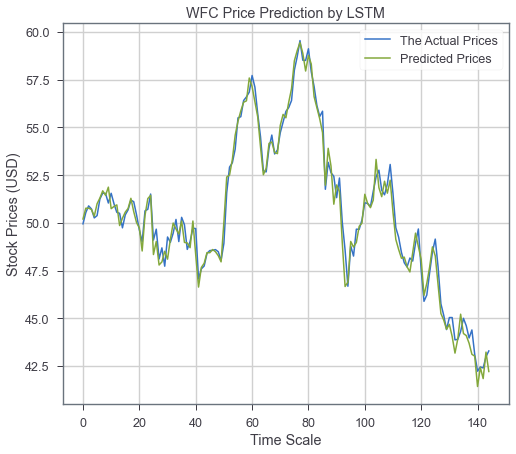

In [17]:
#Predicted vs True Adj Close Value – LSTM
jtplot.style(theme='grade3',context='notebook',ticks=True,grid=True)
plt.plot(y_test, label='The Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.title("WFC Price Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Stock Prices (USD)')
plt.legend()
plt.show()
#plt.savefig("BAC_LSTM_graph")



In [18]:
from sklearn.metrics import mean_squared_error
import math
from math import sqrt
import requests
import keras
from keras.models import load_model
from sklearn import preprocessing
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [19]:
def denormalize(df, normalized_value):
    df = df['Open'].values.reshape(-1,1)
    normalized_value = normalized_value.reshape(-1,1)

    #return df.shape, p.shape
    min_max_scaler = preprocessing.MinMaxScaler()
    a = min_max_scaler.fit_transform(df)
    new = min_max_scaler.inverse_transform(normalized_value)
    return new
p = lstm.predict(X_test)
newp = denormalize(df, p)
newy_test = denormalize(df, y_test)

In [20]:
# use F score to measure the model

def model_F_score(newp,newy_test):
    TP=0
    FN=0
    FP=0
    for i in range(len(newp)-1):
        test_prof=newy_test[i+1]-newy_test[i]
        p_prof=newp[i+1] - newp[i]

        if((test_prof>=0) and (p_prof>=0)):
            TP=TP+1
        if ((test_prof>= 0) and (p_prof<0)):
            FN=FN+1
        if ((test_prof<0) and (p_prof>=0)):
            FP=FP+1

    Precision=float(TP)/float(TP+FP)
    Recall=float(TP)/float(TP+FN)

    Fscore= 2.0*Precision*Recall/(Precision+Recall)
    print('classification F score: %.5f' % (Fscore))
    return Fscore
    
testScore = math.sqrt(mean_squared_error(newp, newy_test))
print('Test Score: %.2f RMSE' % (testScore))

F_score=model_F_score(newp,newy_test)
print ('F_score',F_score)

Test Score: 25.50 RMSE
classification F score: 0.77551
F_score 0.7755102040816325
